In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
np.set_printoptions(precision=4, suppress=True)

In [369]:
sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [370]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [371]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [372]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [373]:
# Resolve inconsistency issue
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#Second question: What are the daily and monthly price changes at ticker and sector level? Calculate daily and monthly price changes by ticker and sector level. Determine distribution of standard deviation.

# Checking and preparing the data for the calculations

In [374]:
# Check the data for the missing values

cleanDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          619040 non-null  object 
 1   close         619040 non-null  float64
 2   ticker        619040 non-null  object 
 3   company name  619040 non-null  object 
 4   sector        619040 non-null  object 
dtypes: float64(1), object(4)
memory usage: 28.3+ MB


In [375]:
# Change date type to DatetimeIndex

cleanDataset['date']=pd.to_datetime(cleanDataset['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [376]:
# Set date as index

cleanDataset_=cleanDataset.set_index('date').sort_index()
cleanDataset_

,close,ticker,company name,sector
date,,,,
2013-01-03,68.285,UNP,Union Pacific Corporation,Industrials
2013-01-03,39.570,MAR,Marriott International,Consumer Cyclical
2013-01-03,76.370,AAP,Advance Auto Parts Inc W/I,Consumer Cyclical
2013-01-03,80.310,VNO,Vornado Realty Trust,Real Estate
2013-01-03,105.080,COO,The Cooper Companies Inc.,Healthcare
...,...,...,...,...
2018-12-01,33.870,GPS,Gap Inc. (The),Consumer Cyclical
2018-12-01,133.520,ALB,Albemarle Corporation,Basic Materials
2018-12-01,159.090,CXO,Concho Resources Inc.,Energy


In [377]:
# Check the date for the missing values

cleanDataset_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 619040 entries, 2013-01-03 to 2018-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   close         619040 non-null  float64
 1   ticker        619040 non-null  object 
 2   company name  619040 non-null  object 
 3   sector        619040 non-null  object 
dtypes: float64(1), object(3)
memory usage: 23.6+ MB


In [378]:
# Check index

cleanDataset_.index

DatetimeIndex(['2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-03', '2013-01-03', '2013-01-03', '2013-01-03',
               '2013-01-03', '2013-01-03',
               ...
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01',
               '2018-12-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=619040, freq=None)

# Calculation of daily and monthly price changes.

In [379]:
SP_500_daily_returns = cleanDataset_.pivot_table(values='close', index='date').pct_change().dropna()
SP_500_daily_returns

,close
date,
2013-01-04,0.026881
2013-01-05,0.015781
2013-01-07,0.018477
2013-01-08,0.063137
2013-01-10,0.011746
...,...
2018-08-01,0.021570
2018-09-01,0.001839
2018-10-01,-0.002897


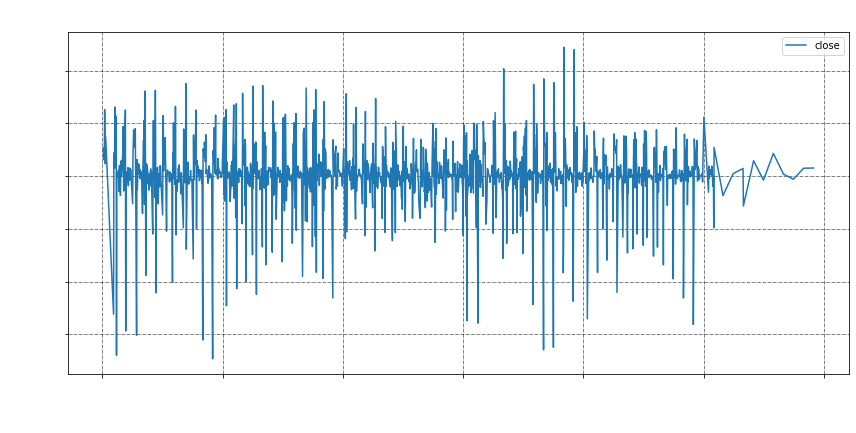

In [380]:
SP_500_daily_returns.plot(figsize=(14, 7))
plt.title('S&P_500_Daily_Returns_Data', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

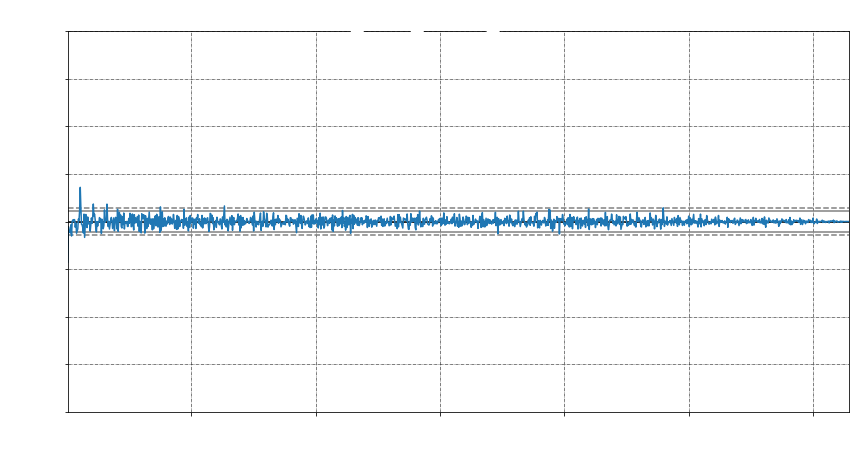

In [410]:
autocorrelation_plot(SP_500_daily_returns)
plt.rc('figure', figsize=(14, 7))
plt.title('SP_500_Daily_Returns', size=25, color='w')
plt.xlabel('Lag', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Autocorrelation', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

In [382]:
cleanDataset_monthend = cleanDataset_.resample('BM').last()
SP_500_monthly_returns = cleanDataset_monthend.pivot_table(values='close', index='date').pct_change().dropna()
SP_500_monthly_returns

,close
date,
2013-02-28,3.912364
2013-03-29,-0.858651
2013-04-30,0.865198
2013-05-31,-0.255004
2013-06-28,0.466052
...,...
2018-08-31,-0.555825
2018-09-28,0.825364
2018-10-31,2.172384


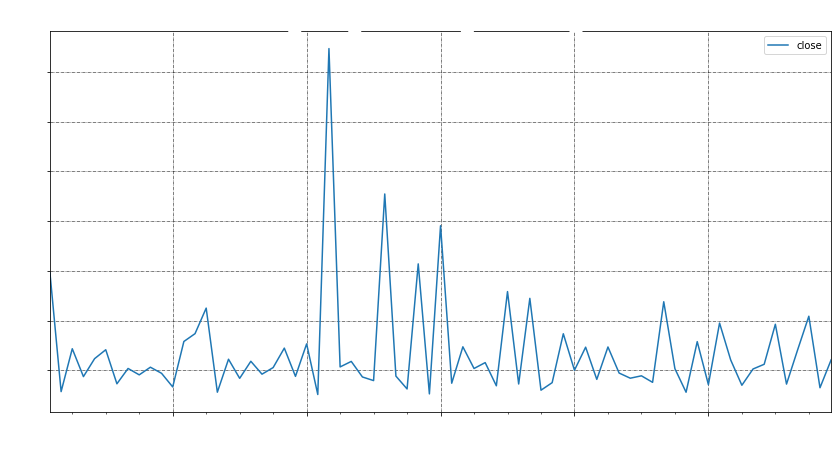

array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ])

In [383]:
SP_500_monthly_returns.plot(figsize=(14, 7))
plt.title('S&P_500_Monthly_Returns_Data', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
np.arange(4,8.5,step=0.5)

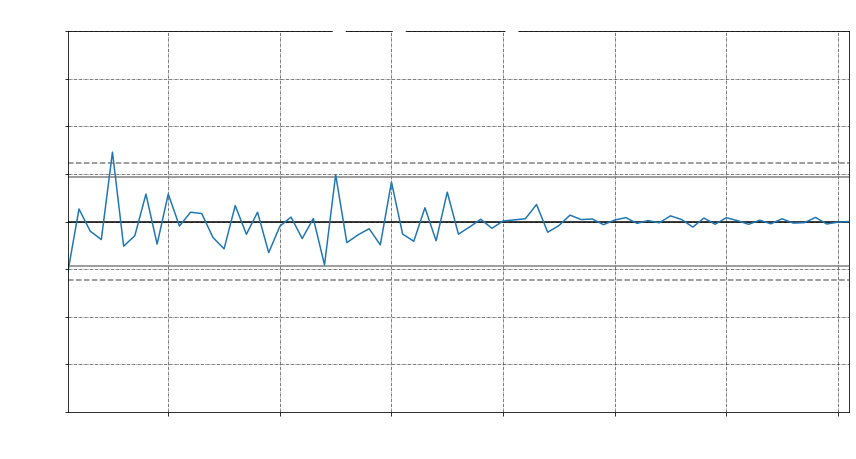

In [384]:
autocorrelation_plot(SP_500_monthly_returns)
plt.rc('figure', figsize=(14, 7))
plt.title('SP_500_Monthly_Returns', size=25, color='w')
plt.xlabel('Lag', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Autocorrelation', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Calculation of daily and monthly price changes by Ticker and Sector level.

**Daily and monthly price changes by Ticker and distribution of standard deviation.**

In [385]:
# Daily returns by Ticker

# Some companies joined to group in different times and during the daily return calculation we got NaN values in different times. That's why we need to keep NaN rows.  

SP_500_daily_returns_by_ticker = cleanDataset_.pivot_table(values='close', index='date', columns='ticker').pct_change()
SP_500_daily_returns_by_ticker

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,...,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,-0.023849,0.224835,0.078172,-0.003625,0.087543,0.076282,0.050893,0.013766,0.089129,0.003980,0.053800,0.049230,0.011288,0.068790,0.030688,0.038322,0.048617,0.102737,0.039052,0.080898,0.010040,0.035954,0.075562,0.077627,-0.047749,-0.046508,0.042082,0.213740,0.063215,NaN,0.101763,-0.016924,0.008264,0.025789,0.041296,0.105098,0.070358,-0.004864,-0.015542,-0.024704,...,0.030955,0.058641,0.014679,0.030620,0.034876,-0.035599,-0.033660,0.048686,0.036271,0.024258,0.169591,0.031434,0.053510,-0.000747,0.136738,0.046077,0.030259,0.043515,0.015042,NaN,0.047154,0.121490,0.051436,NaN,0.028050,0.059520,0.059337,0.056790,0.123568,0.030303,0.049618,0.027285,0.014984,0.023081,0.055215,-0.008730,0.091397,0.001867,0.030782,-0.058092
2013-01-05,0.009284,-0.004199,0.024290,0.024202,0.107733,0.042603,0.044747,0.051681,0.030659,-0.033693,-0.003265,0.033006,0.062792,-0.043576,0.028056,0.056289,0.103118,0.112066,0.042761,0.129029,0.077426,0.003244,0.052468,0.031773,0.250430,-0.035400,0.006473,-0.060849,-0.017857,NaN,0.011192,0.083084,0.319672,-0.064380,-0.008747,0.021797,0.001235,0.079486,-0.051145,-0.105189,...,-0.020125,-0.007947,-0.106969,0.059053,0.067725,-0.137647,-0.037022,0.037758,-0.008505,-0.021781,0.422778,0.080952,0.064608,-0.014088,0.041942,0.087302,0.041823,0.014351,-0.027311,NaN,0.049431,-0.011334,0.034867,NaN,0.066849,-0.037983,-0.064416,0.105772,-0.021479,0.062880,0.021157,-0.001062,-0.035915,-0.006887,-0.031395,0.009174,-0.050162,0.002263,-0.024213,0.024547
2013-01-07,0.055192,0.012048,-0.029049,-0.068453,-0.086498,0.021731,-0.050420,-0.096151,0.034109,0.033956,0.022930,0.039359,0.057205,-0.114952,-0.054581,-0.131954,-0.137681,0.087554,0.060500,0.201648,0.094683,-0.031361,0.088086,0.040197,-0.015353,0.065956,0.157427,-0.115185,0.005992,NaN,-0.008379,0.023842,0.273292,0.085384,0.075770,-0.067438,0.116228,-0.142023,0.136446,0.020444,...,0.040527,0.115649,0.061371,0.111979,0.028680,-0.116813,0.008475,-0.050229,0.001485,-0.029183,0.046857,-0.136438,-0.038931,0.108140,-0.093993,0.150730,-0.091340,0.104111,0.026572,NaN,0.003206,-0.133031,-0.044453,NaN,0.094629,-0.067684,-0.045734,-0.056967,-0.077938,-0.107506,-0.008741,0.061154,0.031882,-0.015782,0.109244,0.005455,0.038757,-0.003984,0.213813,-0.083258
2013-01-08,0.056206,0.153571,0.018806,0.115968,0.087479,0.068897,0.051670,0.038141,0.031686,0.100727,0.082387,0.034557,0.127865,0.013905,0.069219,0.046773,0.063866,0.005998,0.101786,0.082430,0.043912,-0.018024,0.061153,0.012881,0.108680,-0.010313,0.164065,0.181079,0.072499,NaN,0.222721,0.113061,-0.070732,0.103656,0.144566,0.122064,0.117141,-0.010137,0.083197,0.112502,...,0.131307,-0.032664,0.074259,0.030970,0.096917,0.052847,0.018241,0.013854,0.061769,0.077266,0.003606,-0.056697,-0.006950,0.005470,0.153135,0.053600,0.088111,0.070116,0.179206,NaN,0.045723,0.110086,0.048666,NaN,0.060164,0.007473,0.110317,0.069905,0.212596,0.081254,0.047028,0.181408,0.026910,0.042274,0.072511,-0.088969,0.052407,0.126267,0.027257,-0.014701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

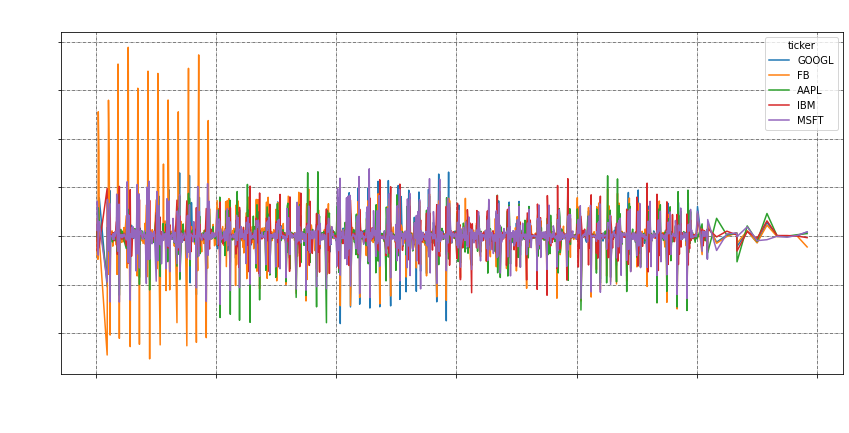

In [386]:
SP_500_daily_returns_by_ticker_10 = SP_500_daily_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_daily_returns_by_ticker_10.plot(figsize=(14, 7))
plt.title('S&P_500_Daily_Returns_by_Ticker_10', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [387]:
# Daily distribution of standard deviation.

SP_500_daily_returns_by_ticker_std = SP_500_daily_returns_by_ticker.std()
SP_500_daily_returns_by_ticker_std

ticker
A       0.066302
AAL     0.095608
AAP     0.100332
AAPL    0.065731
ABBV    0.068795
          ...   
XYL     0.061417
YUM     0.066052
ZBH     0.053838
ZION    0.069528
ZTS     0.055671
Length: 505, dtype: float64

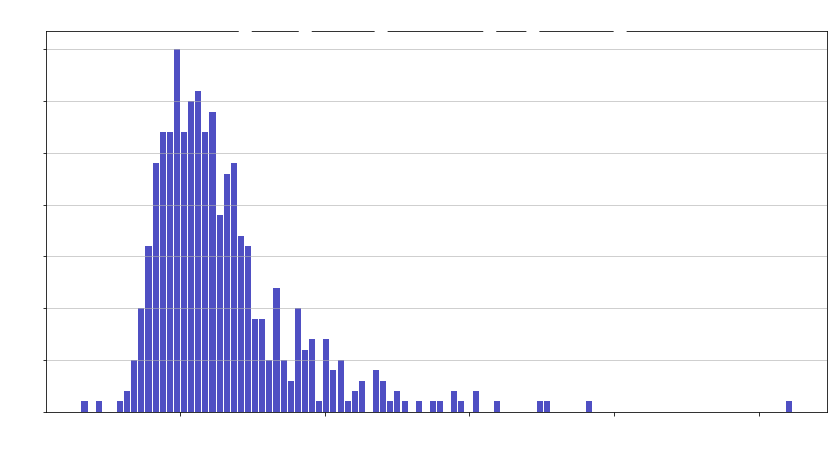

In [388]:
plt.figure(figsize=[14,7])
n, bins, patches = plt.hist(SP_500_daily_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Daily_Returns_by_Ticker_std', size=25, color='w')
plt.show()

In [418]:
# Monthly returns by Ticker

cleanDataset_monthend_ = cleanDataset_.resample('M').last()
SP_500_daily_returns_by_ticker = cleanDataset_monthend_.groupby(['date','ticker']).close
#SP_500_monthly_returns_by_ticker = cleanDataset_monthend_.pivot_table(values='close', index='date', columns='ticker').pct_change()
SP_500_monthly_returns_by_ticker

ticker,A,ABBV,AEP,AJG,ALK,AMD,APA,APC,BEN,BIIB,C,CAT,CELG,CL,COG,DAL,DISCK,EFX,EOG,ESS,ETFC,EVHC,FE,GPS,GS,GWW,HAS,HPE,HRB,ILMN,IT,JEC,JNPR,KO,LB,LLL,M,MAC,MCHP,MHK,MOS,NAVI,NBL,NDAQ,NEE,NTRS,PCAR,PH,PKI,PM,PNW,RCL,RHI,ROST,RSG,SHW,SPGI,STT,T,TDG,TMO,UAL,UHS,WBA,WDC,WEC,WU,YUM
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.01,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
SP_500_monthly_returns_by_ticker_10 = SP_500_monthly_returns_by_ticker[['GOOGL', 'FB', 'AAPL', 'IBM', 'MSFT']]
SP_500_monthly_returns_by_ticker_10.plot(figsize=(14, 7))
plt.title('S&P_500_Monthly_Returns_by_Ticker_10', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

KeyError: ignored

In [392]:
# Monthly distribution of standard deviation.

SP_500_monthly_returns_by_ticker_std = SP_500_monthly_returns_by_ticker.std()
SP_500_monthly_returns_by_ticker_std

ticker
A      NaN
ABBV   NaN
AEP    NaN
AJG    NaN
ALK    NaN
        ..
WBA    NaN
WDC    NaN
WEC    NaN
WU     NaN
YUM    NaN
Length: 68, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


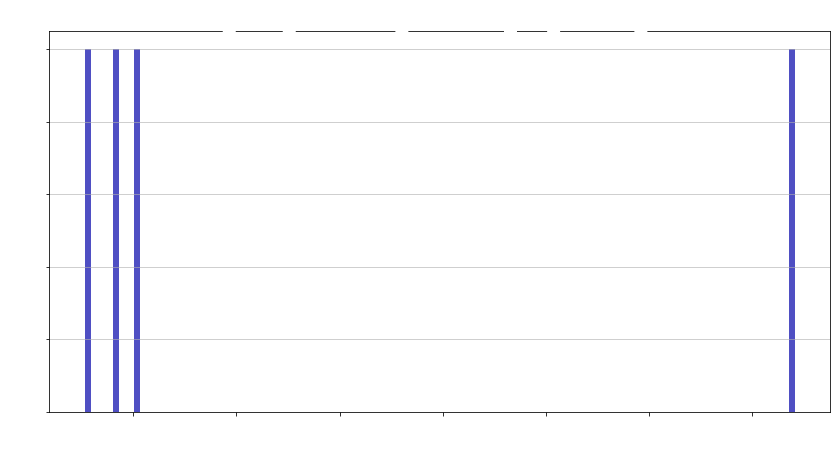

In [393]:
plt.figure(figsize=[14,7])
n, bins, patches = plt.hist(SP_500_monthly_returns_by_ticker_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Monthly_Returns_by_Ticker_std', size=25, color='w')
plt.show()

**Daily and monthly price changes by Sector and daily distribution of standard deviation.**

In [394]:
# Daily returns by Sector

SP_500_daily_returns_by_sector = cleanDataset_.pivot_table(values='close', index='date', columns='sector').pct_change().dropna()
SP_500_daily_returns_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2013-01-04,0.008438,0.023521,0.021288,0.050908,0.031962,0.037974,0.036990,0.023440,0.013409,0.006633,0.042031
2013-01-05,-0.001549,0.016405,0.035095,0.019917,-0.036081,0.015943,0.032380,-0.006428,0.051533,-0.005890,0.052349
2013-01-07,0.011591,0.116176,-0.000503,-0.031462,0.032463,0.061961,0.034895,0.045098,-0.072201,0.027340,-0.082707
2013-01-08,0.037939,0.059302,0.068104,0.046285,0.081512,0.073984,0.063548,0.072482,0.002670,0.079920,0.063697
2013-01-10,0.031188,0.100114,0.014690,-0.038793,0.035481,-0.015015,0.031440,0.018213,-0.022366,0.019291,-0.057649
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0.063970,-0.012108,-0.010304,0.034890,0.092418,0.002567,0.010266,0.012438,0.089924,0.038697,0.085456
2018-09-01,-0.001745,0.002658,0.000448,0.000032,-0.003700,0.007105,0.011656,0.005199,-0.012676,-0.005272,-0.010232
2018-10-01,-0.006830,-0.000376,-0.002814,-0.007586,-0.001082,0.005030,-0.001129,-0.002443,-0.016970,-0.004372,-0.011508


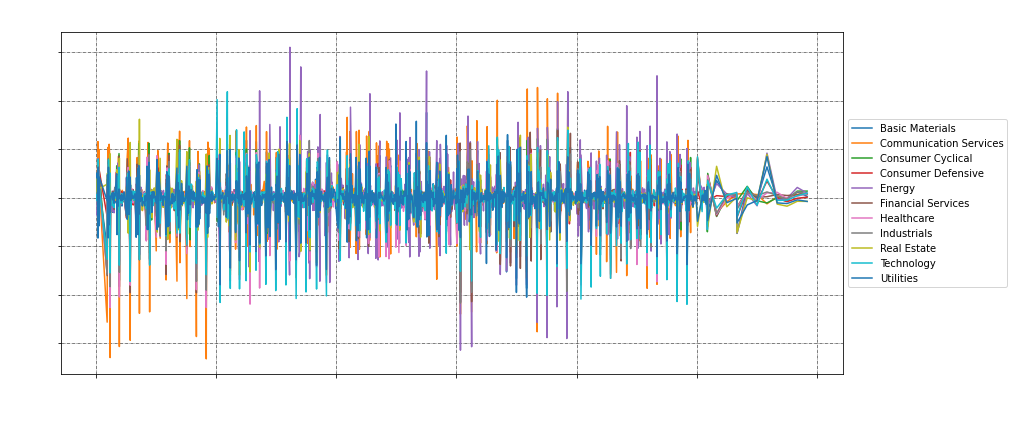

In [395]:
SP_500_daily_returns_by_sector.plot(figsize=(14, 7))
plt.title('S&P_500_Daily_Returns_by_Sector', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Percent', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [396]:
# Daily distribution of standard deviation.

SP_500_daily_returns_by_sector_std = SP_500_daily_returns_by_sector.std()
SP_500_daily_returns_by_sector_std

sector
Basic Materials           0.035965
Communication Services    0.054650
Consumer Cyclical         0.032065
Consumer Defensive        0.028552
Energy                    0.055359
Financial Services        0.039459
Healthcare                0.041095
Industrials               0.036080
Real Estate               0.034762
Technology                0.044270
Utilities                 0.036688
dtype: float64

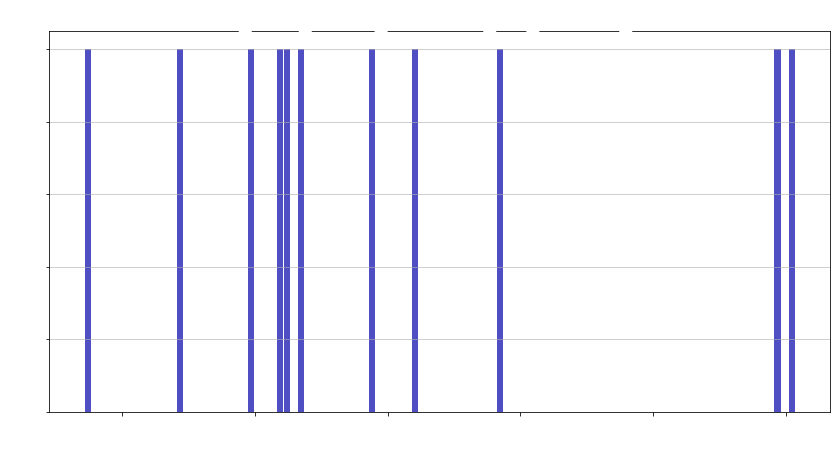

In [397]:
plt.figure(figsize=[14,7])
n, bins, patches = plt.hist(SP_500_daily_returns_by_sector_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Daily_Returns_by_Sector_std', size=25, color='w')
plt.show()

In [398]:
# Monthly returns by Sector

SP_500_monthly_returns_by_sector = cleanDataset_monthend.pivot_table(values='close', index='date', columns='sector').pct_change().dropna()
SP_500_monthly_returns_by_sector

sector,Basic Materials,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
date,,,,,,,,,,,
2018-01-31,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.758646,0.0
2018-02-28,0.0,0.0,1.627765,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2018-03-30,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.582711,0.0,0.000000,0.0
2018-04-30,0.0,0.0,-0.439697,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2018-05-31,0.0,0.0,0.000000,0.000000,-0.279866,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2018-06-29,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.762035,0.000000,0.0,0.000000,0.0
2018-07-31,0.0,0.0,0.000000,0.190608,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2018-08-31,0.0,0.0,0.000000,0.000000,0.000000,-0.548195,0.000000,0.000000,0.0,0.000000,0.0
2018-09-28,0.0,0.0,0.000000,0.000000,0.000000,0.825364,0.000000,0.000000,0.0,0.000000,0.0


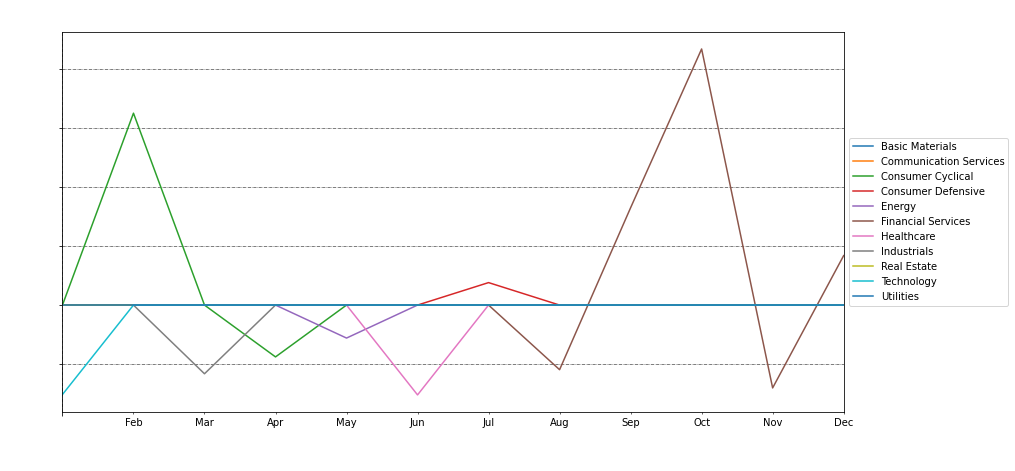

In [399]:
SP_500_monthly_returns_by_sector.plot(figsize=(14, 7))
plt.title('S&P_500_Monthly_Returns_by_Sector', size=25, color='w')
plt.xlabel('Year', size=20, color='w')
plt.xticks(color='w')
plt.ylabel('Close_Price', size=20, color='w')
plt.yticks(color='w')
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [400]:
# Monthly distribution of standard deviation.

SP_500_monthly_returns_by_sector_std = SP_500_monthly_returns_by_sector.std()
SP_500_monthly_returns_by_sector_std

sector
Basic Materials           0.000000
Communication Services    0.000000
Consumer Cyclical         0.497752
Consumer Defensive        0.055024
Energy                    0.080790
Financial Services        0.737320
Healthcare                0.219981
Industrials               0.168214
Real Estate               0.000000
Technology                0.219002
Utilities                 0.000000
dtype: float64

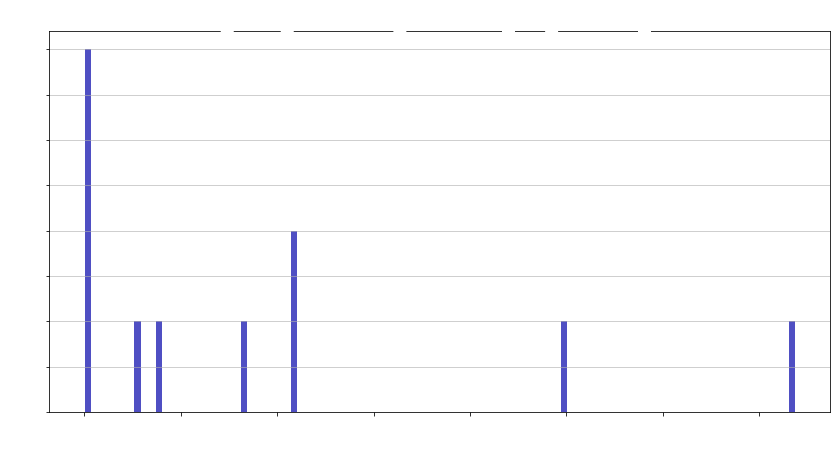

In [401]:
plt.figure(figsize=[14,7])
n, bins, patches = plt.hist(SP_500_monthly_returns_by_sector_std, bins=100, color='#0504aa',alpha=0.7, rwidth=0.85)

#x1 = SP_500_monthly_returns_by_sector_std['']
#x2 = SP_500_monthly_returns_by_sector_std['Consumer Defensive']
#x3 = SP_500_monthly_returns_by_sector_std['Energy']

#plt.hist(x1, color='g', label='Consumer Cyclical')
#plt.hist(x2, color='b', label='Consumer Defensive')
#plt.hist(x3, color='r', label='Energy')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value', size=20, color='w')
plt.ylabel('Frequency', size=20, color='w')
plt.xticks(color='w')
plt.yticks(color='w')
plt.ylabel('Frequency', size=15, color='w')
plt.title('SP_500_Monthly_Returns_by_Sector_std', size=25, color='w')
plt.show()

# Conclusion: